In [1]:
import torch
from torch import nn,  optim
from utils import load_data
import matplotlib.pyplot as plt
from fcn import FCN
from cnn import CNN
from sae import StackedAE
from utils import train_visualization, weight_initialization, shuffle


In [2]:
import time

In [3]:
train_input, train_target, train_classes, test_input, test_target, test_classes = load_data()

In [4]:
def train(net, train_input, train_target, train_classes, eta=1e-3, n_epochs=25, batch_size=100, verbose=True):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(net.parameters(), lr=eta, weight_decay=1e-5)
    
    losses, accuracies = [], []
    
    for e in range(n_epochs):
        sum_loss = 0
        net.train()
        for b in range(0, train_input.size(0), batch_size):
            trainX = train_input.narrow(0, b, batch_size)
            trainC = train_target.narrow(0, b, batch_size)
            

            out1 = net(trainX)
            #print(out1.shape,trainC.shape)
            loss = criterion(out1,trainC.float())
            
            sum_loss += loss.item()
           
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        net.eval()
        with torch.no_grad():
            acc = compute_accuracy(net, train_input, train_target)
        losses.append(sum_loss)
        accuracies.append(acc)
        if verbose:
            print('Epoch %d/%d, Loss: %.3f, Accuracy: %.3f' % (e+1, n_epochs, sum_loss, acc))
    
    return losses, accuracies

def trial(net, train_input, train_classes, train_target, test_input, test_target, n_trials=10):
    all_losses = []
    all_train_accuracies = []
    all_test_accuracies = []
    for i in range(n_trials):
        print(f'Trial {i+1}/{n_trials}...')
        # Shuffle data
        train_input, train_target, train_classes = shuffle(train_input, train_target, train_classes)
        
        # Reset weights
        net.train()
        net.apply(weight_initialization)
        
        # Train
        train_loss, train_acc = train(net, train_input, train_target, train_classes, verbose=False)
        
        # Collect data
        all_losses.append(train_loss)
        all_train_accuracies.append(train_acc)
        net.eval()
        with torch.no_grad():
            test_acc = compute_accuracy(net, test_input, test_target)
            all_test_accuracies.append(test_acc)
        
        print('Loss: %.3f, Train accuracy: %.3f, Test_accuracy: %.3f' % (train_loss[-1], train_acc[-1], test_acc))
    
    return torch.FloatTensor(all_losses), torch.FloatTensor(all_train_accuracies), torch.FloatTensor(all_test_accuracies)

In [5]:
def compute_accuracy(net, train,target):
    with torch.no_grad():
        out1 = net(train)
        #max_ = out1.argmax(1)

        for i, x in enumerate(out1):
            out1[i] = 1 if x > 0.5 else 0 
    return (out1 == target).sum().item()/len(target)






In [6]:
from conv_net import Net

In [10]:
net = Net(3)

found size  64
baseline number of channel : 5
netwok created
Parameters conv : 2375
Parameters fc : 64101
Parameters : 66476
torch.Size([5, 2, 3, 3])
torch.Size([5])
torch.Size([10, 5, 3, 3])
torch.Size([10])
torch.Size([20, 10, 3, 3])
torch.Size([20])
torch.Size([50, 1280])
torch.Size([50])
torch.Size([1, 50])
torch.Size([1])


In [11]:
start = time.time()
train(net, train_input, train_target, train_classes, batch_size=100)
print(time.time()-start)

Epoch 1/25, Loss: 6.891, Accuracy: 0.552
Epoch 2/25, Loss: 6.580, Accuracy: 0.681
Epoch 3/25, Loss: 5.966, Accuracy: 0.750
Epoch 4/25, Loss: 5.365, Accuracy: 0.754
Epoch 5/25, Loss: 5.110, Accuracy: 0.742
Epoch 6/25, Loss: 4.974, Accuracy: 0.782
Epoch 7/25, Loss: 4.791, Accuracy: 0.788
Epoch 8/25, Loss: 4.502, Accuracy: 0.796
Epoch 9/25, Loss: 4.380, Accuracy: 0.799
Epoch 10/25, Loss: 4.323, Accuracy: 0.805
Epoch 11/25, Loss: 4.265, Accuracy: 0.814
Epoch 12/25, Loss: 4.170, Accuracy: 0.818
Epoch 13/25, Loss: 4.026, Accuracy: 0.821
Epoch 14/25, Loss: 3.888, Accuracy: 0.828
Epoch 15/25, Loss: 3.770, Accuracy: 0.838
Epoch 16/25, Loss: 3.667, Accuracy: 0.845
Epoch 17/25, Loss: 3.565, Accuracy: 0.847
Epoch 18/25, Loss: 3.453, Accuracy: 0.846
Epoch 19/25, Loss: 3.331, Accuracy: 0.856
Epoch 20/25, Loss: 3.201, Accuracy: 0.864
Epoch 21/25, Loss: 3.063, Accuracy: 0.871
Epoch 22/25, Loss: 2.926, Accuracy: 0.884
Epoch 23/25, Loss: 2.793, Accuracy: 0.892
Epoch 24/25, Loss: 2.663, Accuracy: 0.895
E

In [12]:
start = time.time()
tr_loss, tr_acc, te_acc = trial(net, train_input, train_classes, train_target, test_input, test_target)


print(time.time()-start)

Trial 1/10...
Loss: 0.586, Train accuracy: 0.997, Test_accuracy: 0.821
Trial 2/10...
Loss: 0.213, Train accuracy: 1.000, Test_accuracy: 0.826
Trial 3/10...
Loss: 0.400, Train accuracy: 0.985, Test_accuracy: 0.814
Trial 4/10...
Loss: 0.137, Train accuracy: 1.000, Test_accuracy: 0.825
Trial 5/10...
Loss: 0.070, Train accuracy: 1.000, Test_accuracy: 0.827
Trial 6/10...
Loss: 0.061, Train accuracy: 1.000, Test_accuracy: 0.843
Trial 7/10...
Loss: 0.057, Train accuracy: 1.000, Test_accuracy: 0.830
Trial 8/10...
Loss: 0.032, Train accuracy: 1.000, Test_accuracy: 0.836
Trial 9/10...
Loss: 0.030, Train accuracy: 1.000, Test_accuracy: 0.839
Trial 10/10...
Loss: 0.032, Train accuracy: 1.000, Test_accuracy: 0.838
61.82248592376709


In [ ]:
fcn = FCN(3)
sae = StackedAE(4)
cnn = CNN(3, K=3)

In [ ]:
cnn

In [19]:
tt1 = train_input[:10,0,:,:]

In [20]:
cnn(tt1, tt1)[0].shape

torch.Size([10, 10])

In [11]:
print([p.numel() for p in cnn.parameters()])

[207, 23, 9522, 46, 19044, 46, 41400, 100, 1000, 10]


In [8]:
depth_losses = {'mean':[], 'std':[]}

In [1]:
start = time.time()
train(cnn, train_input, train_target, train_classes, batch_size=100)
print(time.time()-start)

NameError: name 'time' is not defined

In [ ]:
depth_losses = {'mean':[], 'std':[]}
depth_tr_acc = {'mean':[], 'std':[]}
depth_te_acc = {'mean':[], 'std':[]}

for depth in range(2,4,2):
    cnn = CNN(depth)
    #sae.pretrain(train_input)
    tr_loss, tr_acc, te_acc = trial(cnn, train_input, train_classes, train_target, test_input, test_target)
    
    depth_losses['mean'].append(tr_loss.mean(0))
    depth_losses['std'].append(tr_loss.std(0))
    depth_tr_acc['mean'].append(tr_acc.mean(0))
    depth_tr_acc['std'].append(tr_acc.std(0))
    depth_te_acc['mean'].append(te_acc.mean(0))
    depth_te_acc['std'].append(te_acc.std(0))

In [ ]:
fig = plt.gcf()

for i, depth in enumerate(range(2,12,2)):
    plt.errorbar(range(25), depth_losses['mean'][i].numpy().T, depth_losses['std'][i].numpy().T, fmt = '.', label=f'depth {depth}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
fig.savefig('CNN_loss.png')

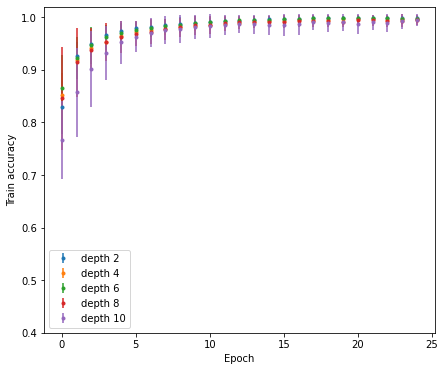

In [10]:
fig = plt.figure(figsize=(7,6))
for i, depth in enumerate(range(2,12,2)):
    plt.errorbar(range(25), depth_tr_acc['mean'][i].numpy().T, depth_tr_acc['std'][i].numpy().T, fmt = '.', label=f'depth {depth}')
plt.xlabel('Epoch')
plt.ylabel('Train accuracy')
plt.legend(loc='best')
plt.ylim((0.4, 1.02))
plt.show()
fig.savefig('CNN_acc.png')

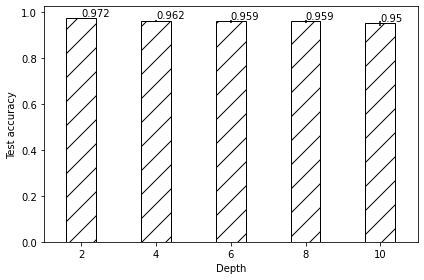

In [20]:
fig = plt.gcf()
plt.bar(range(2,12,2), depth_te_acc['mean'], color="w", yerr=depth_te_acc['std'], ecolor='k', edgecolor='k', hatch='/')
plt.xlabel('Depth')
plt.ylabel('Test accuracy')

for i, value in enumerate(range(2,12,2)):
    plt.text(value, depth_te_acc['mean'][i]+0.01, str(round(depth_te_acc['mean'][i].item(), 3)))

plt.xlim((1,11))
plt.tight_layout()
fig.savefig('CNN_test.png')

In [12]:
tr_mean_loss = tr_loss.mean(0)
tr_std_loss = tr_loss.std(0)
tr_mean_acc = tr_acc.mean(0)
tr_std_acc = tr_acc.std(0)
te_mean_acc = te_acc.mean(0)
te_std_acc = te_acc.std(0)
xl = range(25)
xa = range(25)

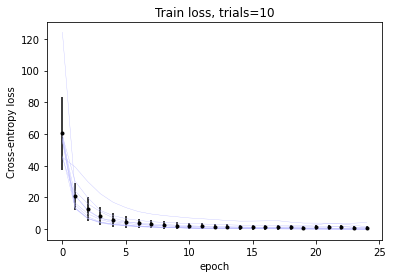

In [15]:
plt.errorbar(xl, tr_mean_loss, tr_std_loss, fmt='.k')
plt.plot(xl, tr_loss.numpy().T, 'k', linestyle="-",color=([0.7, 0.7, 1]),label='loss',linewidth=0.3)
plt.xlabel("epoch")
plt.ylabel("Cross-entropy loss")
plt.title(f'Train loss, trials=10')
plt.show()

In [86]:
tr_acc[-1]

tensor([0.7060, 0.7820, 0.8450, 0.8780, 0.9050, 0.9220, 0.9280, 0.9410, 0.9500,
        0.9610, 0.9640, 0.9640, 0.9750, 0.9800, 0.9770, 0.9780, 0.9800, 0.9850,
        0.9870, 0.9920, 0.9940, 0.9930, 0.9930, 0.9940, 0.9940])

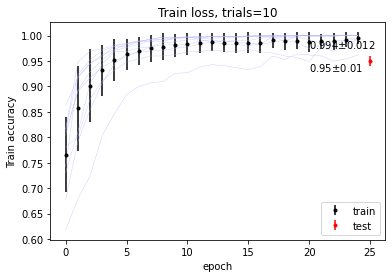

In [16]:
plt.errorbar(xa, tr_mean_acc, tr_std_acc, fmt='.k', label='train')
plt.plot(xa, tr_acc.numpy().T,'k', linestyle="-",color=([0.7, 0.7, 1]),linewidth=0.3)
plt.annotate(repr(round(tr_mean_acc[-1].item(), 3)) + '$\pm$' + repr(round(tr_std_acc[-1].item(),3)), (20, tr_mean_acc[-1]-0.02))
plt.errorbar(25, te_mean_acc, te_std_acc, fmt='.r', label='test')
plt.annotate(repr(round(te_mean_acc.item(), 3)) + '$\pm$' + repr(round(te_std_acc.item(),3)), (20, te_mean_acc-0.02))
plt.xlabel("epoch")
plt.ylabel("Train accuracy")
plt.title(f'Train loss, trials=10')
plt.legend(loc='lower right')
plt.show()

(25,)
(25,)


ValueError: The lengths of the data (25) and the error 1 do not match

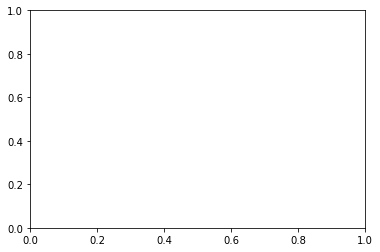

In [49]:
plt.errorbar(x, tr_mean_loss, tr_std_loss, 'r', linestyle="-",label='mean_loss',linewidth=3)
#plt.plot(x,tr_loss.numpy().T,'r',linestyle="-",color=([0.8, 0.8, 1]),label='loss',linewidth=0.3)


In [8]:
a = [[1, 2, 3], [4, 5, 6]]

In [9]:
aa = torch.Tensor(a)

In [10]:
aa

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [11]:
aa.shape

torch.Size([2, 3])

In [5]:
from conv_net import Net

In [6]:
Net(5)

found size  16
inter mult (2, 1)
inter mult (2, 3)
inter mult (2, 5)
inter mult (2, 7)
res 4.099482889325136
rouned 4
baseline number of channel : 4
creating layer :  1
creating layer :  2
exposant :  (2, 1)
creating layer :  3
exposant :  (2, 2)
creating layer :  4
exposant :  (2, 3)
creating layer :  5
exposant :  (2, 4)
netwok created
Parameters conv : 24640
Parameters fc : 41410
Parameters : 66050
torch.Size([4, 1, 3, 3])
torch.Size([4])
torch.Size([8, 4, 3, 3])
torch.Size([8])
torch.Size([16, 8, 3, 3])
torch.Size([16])
torch.Size([32, 16, 3, 3])
torch.Size([32])
torch.Size([64, 32, 3, 3])
torch.Size([64])
torch.Size([40, 1024])
torch.Size([40])
torch.Size([10, 40])
torch.Size([10])


Net(
  (conv_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
    (4): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (7): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU()
    (9): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (10): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (13): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    (14): ReLU()
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=1024, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=10, bias=True)
  

In [7]:
start = time.time()
train(Net(6), train_input, train_target, train_classes, batch_size=100)
print(time.time()-start)

found size  4
inter mult (2, 1)
inter mult (2, 3)
inter mult (2, 5)
inter mult (2, 7)
inter mult (2, 9)
res 3.0575480396966905
rouned 3
baseline number of channel : 3
creating layer :  1
creating layer :  2
exposant :  (2, 1)
creating layer :  3
exposant :  (2, 2)
creating layer :  4
exposant :  (2, 3)
creating layer :  5
exposant :  (2, 4)
creating layer :  6
exposant :  (2, 5)
netwok created
Parameters conv : 55458
Parameters fc : 11860
Parameters : 67318
torch.Size([3, 1, 3, 3])
torch.Size([3])
torch.Size([6, 3, 3, 3])
torch.Size([6])
torch.Size([12, 6, 3, 3])
torch.Size([12])
torch.Size([24, 12, 3, 3])
torch.Size([24])
torch.Size([48, 24, 3, 3])
torch.Size([48])
torch.Size([96, 48, 3, 3])
torch.Size([96])
torch.Size([30, 384])
torch.Size([30])
torch.Size([10, 30])
torch.Size([10])
Epoch 1/25, Loss: 46.256, Accuracy: 0.551
Epoch 2/25, Loss: 45.921, Accuracy: 0.503
Epoch 3/25, Loss: 44.377, Accuracy: 0.587
Epoch 4/25, Loss: 37.108, Accuracy: 0.710
Epoch 5/25, Loss: 25.947, Accuracy: 

In [20]:
depth_losses = {'mean':[], 'std':[]}
depth_tr_acc = {'mean':[], 'std':[]}
depth_te_acc = {'mean':[], 'std':[]}

for depth in range(2,7,1):
    conv = Net(depth)
    #sae.pretrain(train_input)
    tr_loss, tr_acc, te_acc = trial(conv, train_input, train_classes, train_target, test_input, test_target)
    
    depth_losses['mean'].append(tr_loss.mean(0))
    depth_losses['std'].append(tr_loss.std(0))
    depth_tr_acc['mean'].append(tr_acc.mean(0))
    depth_tr_acc['std'].append(tr_acc.std(0))
    depth_te_acc['mean'].append(te_acc.mean(0))
    depth_te_acc['std'].append(te_acc.std(0))

found size  4
baseline number of channel : 27
netwok created
Parameters conv : 13689
Parameters fc : 58861
Parameters : 72550
torch.Size([27, 2, 3, 3])
torch.Size([27])
torch.Size([54, 27, 3, 3])
torch.Size([54])
torch.Size([270, 216])
torch.Size([270])
torch.Size([1, 270])
torch.Size([1])
Trial 1/10...
Loss: 0.238, Train accuracy: 1.000, Test_accuracy: 0.837
Trial 2/10...
Loss: 1.005, Train accuracy: 0.999, Test_accuracy: 0.821
Trial 3/10...
Loss: 0.083, Train accuracy: 1.000, Test_accuracy: 0.821
Trial 4/10...
Loss: 0.015, Train accuracy: 1.000, Test_accuracy: 0.831
Trial 5/10...
Loss: 0.007, Train accuracy: 1.000, Test_accuracy: 0.833
Trial 6/10...
Loss: 0.008, Train accuracy: 1.000, Test_accuracy: 0.833
Trial 7/10...
Loss: 0.005, Train accuracy: 1.000, Test_accuracy: 0.832
Trial 8/10...
Loss: 0.010, Train accuracy: 1.000, Test_accuracy: 0.840
Trial 9/10...
Loss: 0.006, Train accuracy: 1.000, Test_accuracy: 0.836
Trial 10/10...
Loss: 0.005, Train accuracy: 1.000, Test_accuracy: 0.83

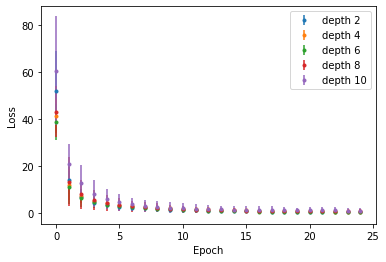

In [9]:
fig = plt.gcf()

for i, depth in enumerate(range(2,12,2)):
    plt.errorbar(range(25), depth_losses['mean'][i].numpy().T, depth_losses['std'][i].numpy().T, fmt = '.', label=f'depth {depth}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
fig.savefig('CNN_loss.png')

{'mean': [tensor([51.7660, 13.8126,  6.6361,  4.2916,  3.2568,  2.6216,  2.1944,  1.8680,
           1.6110,  1.4018,  1.2620,  1.1363,  0.9837,  0.8414,  0.7416,  0.6540,
           0.5750,  0.5099,  0.4581,  0.4128,  0.3737,  0.3400,  0.3095,  0.2835,
           0.2606]),
  tensor([41.2218, 12.0411,  7.1264,  5.1330,  4.1080,  3.4609,  2.9483,  2.5365,
           2.2399,  1.9902,  1.7780,  1.6032,  1.4367,  1.2774,  1.1388,  1.0170,
           0.9137,  0.8285,  0.7666,  0.7093,  0.6598,  0.6138,  0.5716,  0.5526,
           0.5346]),
  tensor([38.6878, 10.8311,  6.3051,  4.5127,  3.5060,  2.8397,  2.3800,  2.0191,
           1.7117,  1.4767,  1.2916,  1.0994,  0.9484,  0.8295,  0.7414,  0.6539,
           0.5394,  0.4757,  0.4244,  0.3929,  0.3502,  0.3312,  0.3099,  0.3103,
           0.2859]),
  tensor([42.9793, 13.3160,  7.8895,  5.4619,  4.1842,  3.4349,  2.8960,  2.4842,
           2.1322,  1.8383,  1.6014,  1.3789,  1.2307,  1.1038,  1.0079,  0.9055,
           0.8128,  0.7569,